In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# iterate through all folders in the current directory, and all subfolders, load all json files into one dataframe

def load_data(path):
    df = pd.DataFrame()
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".json"):
                df = pd.concat([df, pd.read_json(os.path.join(root, file))], ignore_index=True)
    return df

actual = load_data(os.getcwd())

In [53]:
btc = actual[actual['symbol'] == 'BTCUSDT']

In [54]:
btc.index = pd.to_datetime(btc.timestamp)

In [59]:
btc['day'] = btc.index.date

btc['time_since_prev_order'] = btc.index.diff().total_seconds().fillna(0)
btc['price_change'] = btc['price'].groupby(btc.index.date).diff()
btc['price_change'] = np.where(btc.time_since_prev_order > 60 * 60, 0, btc.price_change)


C:\Users\mikol\AppData\Local\Temp\ipykernel_6032\883460868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['day'] = btc.index.date
C:\Users\mikol\AppData\Local\Temp\ipykernel_6032\883460868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['time_since_prev_order'] = btc.index.diff().total_seconds().fillna(0)
C:\Users\mikol\AppData\Local\Temp\ipykernel_6032\883460868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

# Violin plot of price change distribution

C:\Users\mikol\AppData\Local\Temp\ipykernel_6032\2058501861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=btc.index.date, y=btc.price_change, palette="Blues_d")


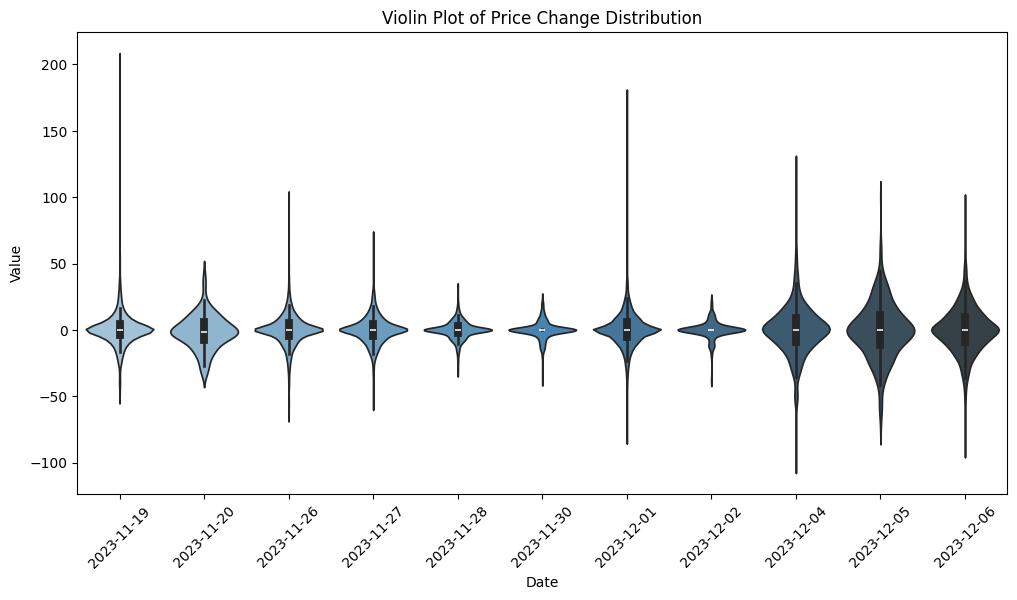

In [60]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=btc.index.date, y=btc.price_change, palette="Blues_d")
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Violin Plot of Price Change Distribution')
plt.show()


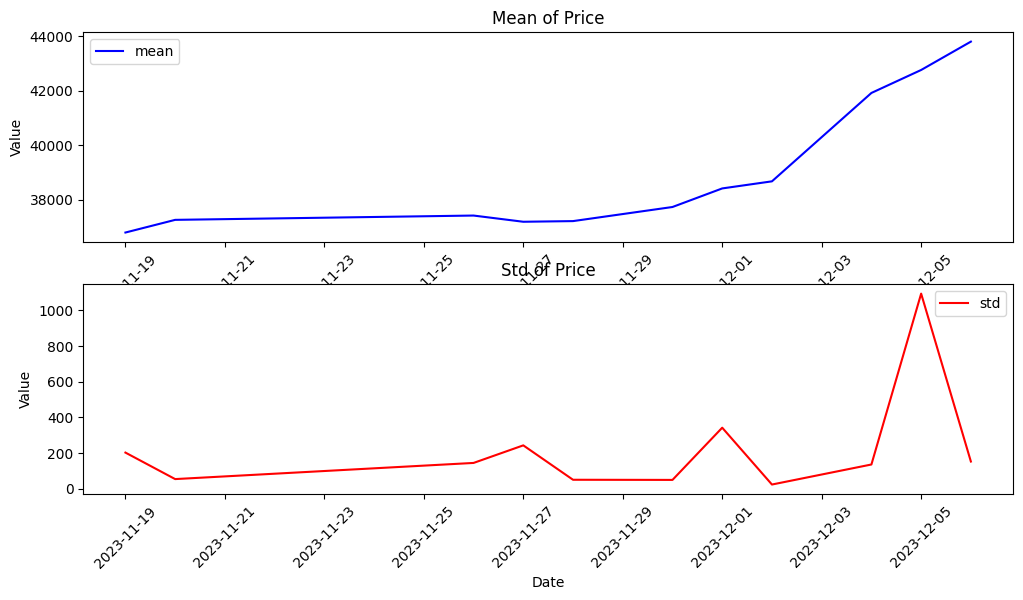

In [85]:
# for each date calculate the mean price and std 
btc_mean = btc.price.groupby(btc.index.date).mean()
btc_std = btc.price.groupby(btc.index.date).std()
#plot the mean price and std
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(btc_mean.index, btc_mean, color='blue', label='mean')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mean of Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(btc_std.index, btc_std, color='red', label='std')
plt.xticks(rotation=45) 
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Std of Price')
plt.legend()

# Histogram of the price changes

In [61]:
btc['price_change'].describe()

count    15151.000000
mean         0.041640
std         13.420298
min        -98.430000
25%         -5.555000
50%          0.000000
75%          5.640000
max        202.190000
Name: price_change, dtype: float64

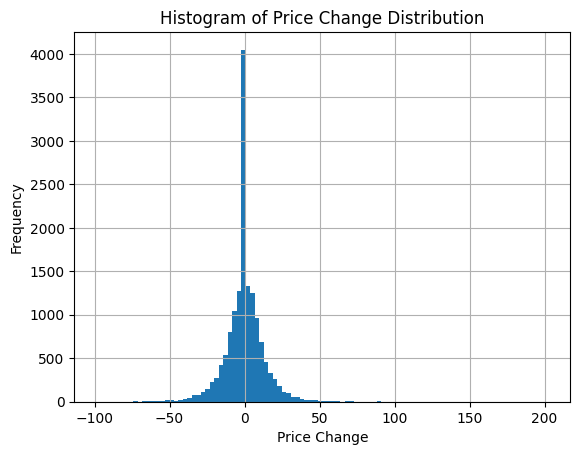

In [63]:
btc.price_change.hist(bins=100)
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.title('Histogram of Price Change Distribution')
plt.show()

# check price changes according to the price value

C:\Users\mikol\AppData\Local\Temp\ipykernel_6032\3742576564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=pd.cut(btc.price, 5), y=btc.price_change, palette="Blues_d")


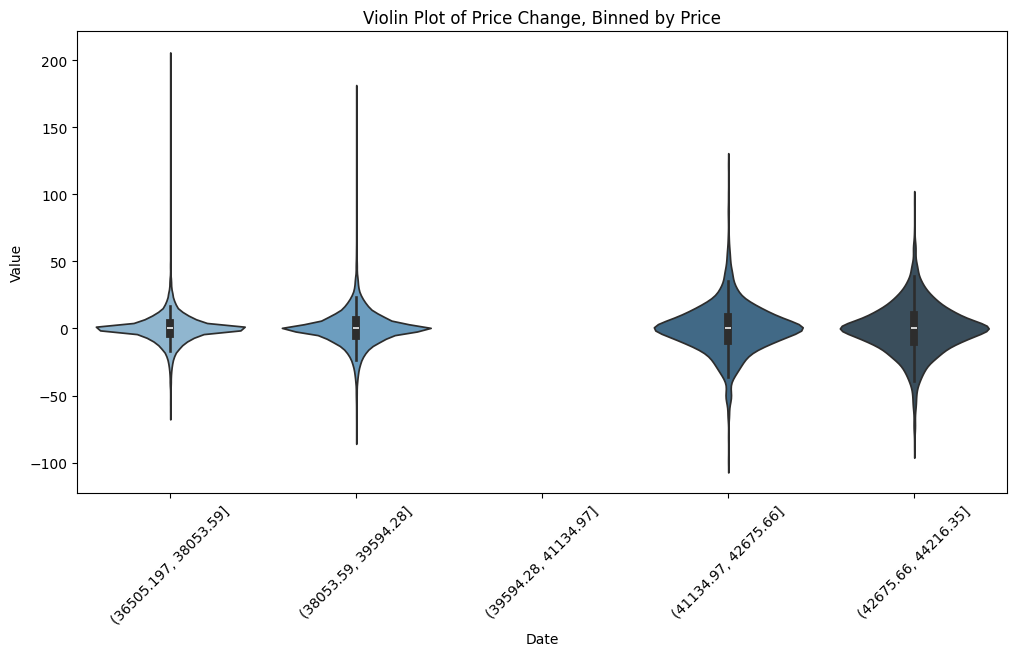

In [69]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=pd.cut(btc.price, 5), y=btc.price_change, palette="Blues_d")
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Violin Plot of Price Change, Binned by Price')
plt.show()


# Relation between price changes and rolling mean of previous price changes 

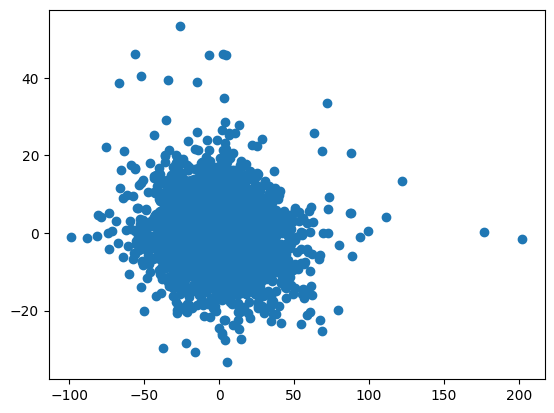

In [78]:
non_zero = btc[btc.price_change != 0]
plt.scatter(non_zero.price_change, non_zero.price_change.shift(1).rolling(4).mean())